# Following neural networks book

https://jingyuexing.github.io/Ebook/Machine_Learning/Neural%20Networks%20and%20Deep%20Learning-eng.pdf

# sigmoid neuron

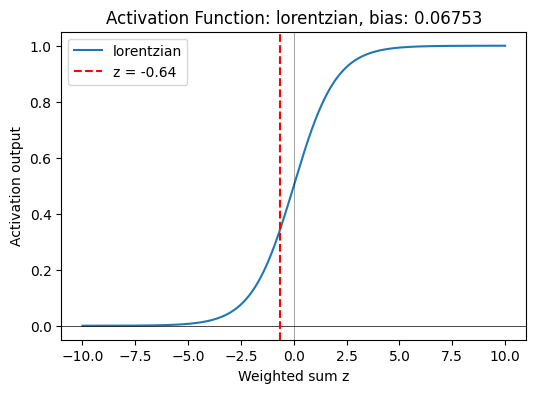

Input: [0.3, 0.5, 0.2, 0.1]
output: 0.3451383264740514
Weights: [-0.90802408 -1.4123037   1.46564877 -0.2257763 ]
Bias: 0.06752820468792384
type: lorentzian
activated: False


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Neuron():
    """A simple neuron class that computes the weighted sum of inputs, adds a bias, and applies an activation function."""
    def __init__(self, n_inputs,weights,bias,activation='lorentzian',plotting=False):
        self.n_inputs = n_inputs
        self.activation = activation
        self.weights = weights
        self.bias = bias
        self.activated=False
        self.plotting=plotting
    
    def __call__(self,x):
        """Compute the output of the neuron given input x."""
        self.z = np.dot(x, self.weights) + self.bias
        y = self.activation_curve(self.z) # using activation function to get neuron output
        
        if self.plotting:
            self.plotting_func(z_value=self.z)
        return y

    def activation_curve(self,z_range):
        """Returns the activation curve for the given z_range."""
        if self.activation == 'lorentzian':
            return 1 / (1 + np.exp(-z_range))
        elif self.activation == 'tanh':
            return np.tanh(z_range)
        elif self.activation == 'relu':
            return np.maximum(0, z_range)
        else:
            raise ValueError("Unsupported activation function")

    def plotting_func(self, z_value=None):
        """Plots the activation function curve and marks current z_value if provided."""
        z_range = np.linspace(-10, 10, 300)
        y_range = self.activation_curve(z_range)

        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(z_range, y_range, label=self.activation)
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5,alpha=0.5)

        # If we have a specific z value for the current input, mark it
        if z_value is not None:
            ax.axvline(z_value, color='red', linestyle='--', label=f'z = {z_value:.2f}')
        
        ax.set_title(f"Activation Function: {self.activation}, bias: {self.bias:.5f}")
        ax.set_xlabel("Weighted sum z")
        ax.set_ylabel("Activation output")
        ax.legend()
        plt.show()
    


x=[0.3, 0.5, 0.2, 0.1]  # Example input
weights=np.random.randn(len(x))  # Example weights
bias=np.random.randn() # Example bias
neuron=Neuron(len(x),weights,bias,activation='lorentzian',plotting=True)

y=neuron(x)
print(f"Input: {x}")
print(f"output: {y}")
print("Weights:", neuron.weights)
print("Bias:", neuron.bias)
print(f"type: {neuron.activation}")
print(f"activated: {neuron.activated}")


# NAND gate

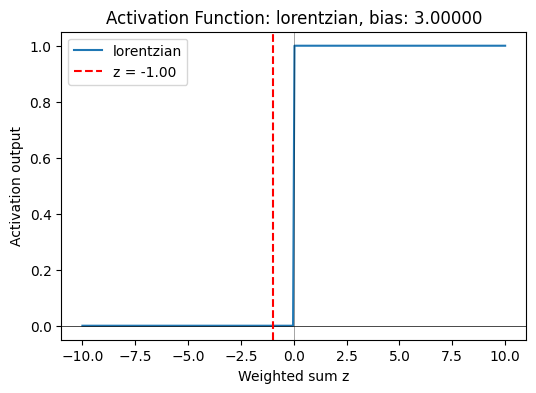

activated:0


In [ ]:
class Perceptron(Neuron):
    """A simple perceptron class that inherits from Neuron and implements a step activation function."""
    def __init__(self, n_inputs, weights, bias,plotting=False):
        super().__init__(n_inputs, weights, bias,plotting=plotting)
    
    def activation_curve(self,z_range):
        """Returns the activation curve for the perceptron."""
        return np.where(z_range > 0, 1, 0) # step function
        
    


x=[1,1]
w=[-2,-2]
bias=3
Nand_neuron=Perceptron(len(x),w,bias,plotting=True)
activated=Nand_neuron(x)
print(f'activated:{activated}')
# Nand_neuron.plotting_func(z_value=np.dot(x, w) + bias)

# AND gate

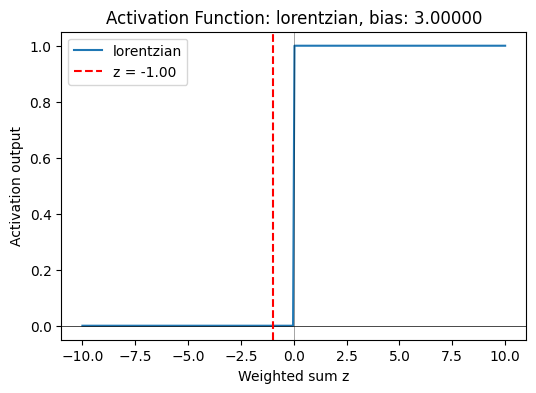

activated: 0


In [292]:
x=[0,1]
NAND1=Perceptron(len(x),[-2,-2],3)
output1=NAND1(x)
NAND2=Perceptron(2,[-2,-2],3,plotting=True)
output2=NAND2([output1,output1])
print(f'activated: {output2}')

# OR gate

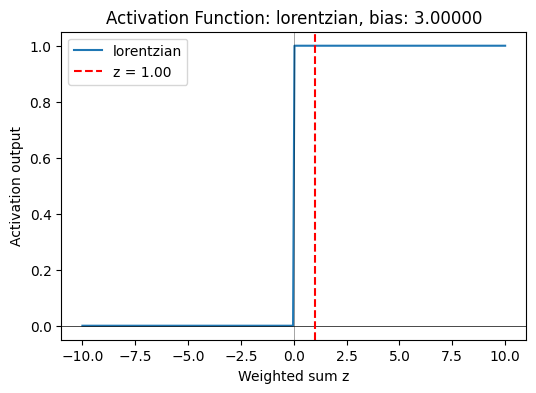

activated: 1


In [293]:
x=[0,1]
NAND1= Perceptron(len(x),[-2,-2],3)
output1=NAND1([x[0],x[0]])
NAND2= Perceptron(2,[-2,-2],3)
output2=NAND2([x[1],x[1]])
NAND3= Perceptron(2,[-2,-2],3,plotting=True)
output3=NAND3([output1,output2])
print(f'activated: {output3}')

# Exercise 1


suppose we take all the weights and biases in a network of perceptrons, and multiply them by a positive constant, . show that the behaviour of the network doesn't change.<br>

$\sigma (\textbf{w}\cdot \textbf{x} + b) = \sigma (k\textbf{w}\cdot \textbf{x} + kb)$, where sigma is a step function i.e. 
$ \sigma =\begin{cases}
1, & \text{if } \mathbf{w} \cdot \mathbf{x} + b > 0, \\
0, & \text{otherwise}.
\end{cases}$, and $k>0$

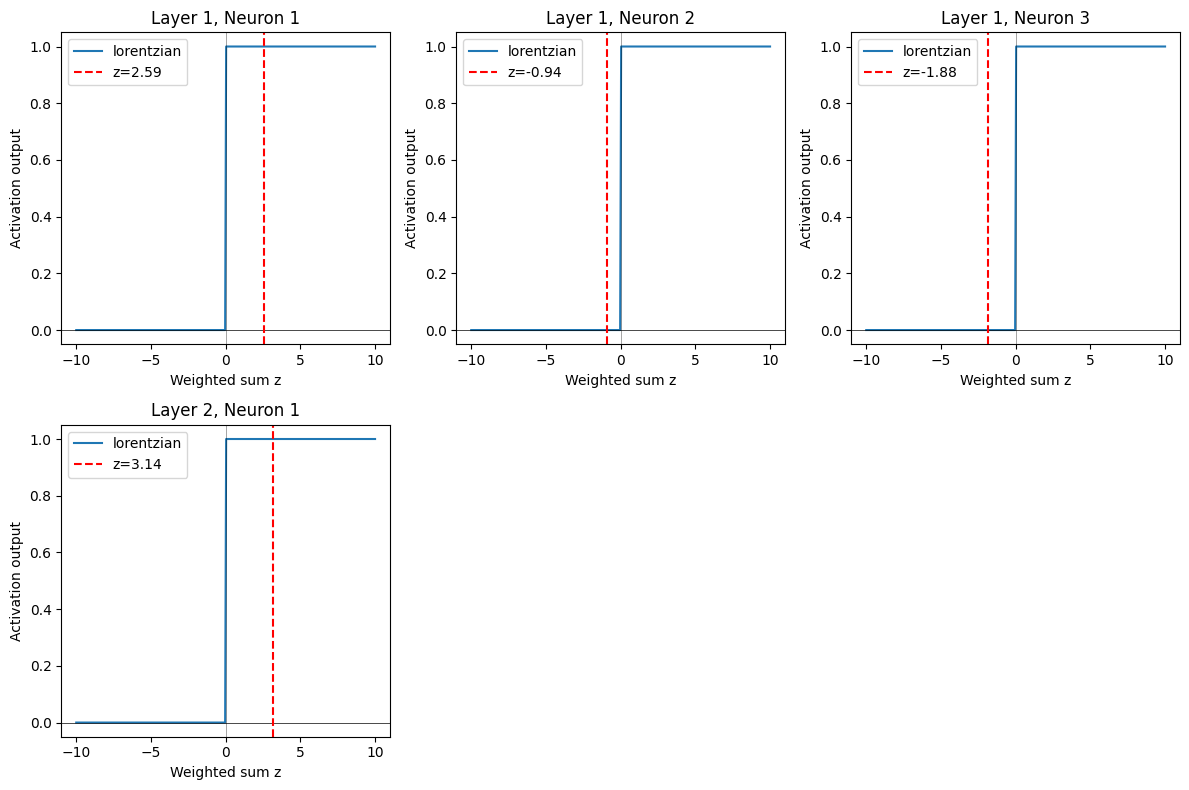

Output of the network: [1]


In [420]:
import numpy as np
class PerceptronLayer:
    """A layer of perceptrons, each perceptron computes a weighted sum of inputs and applies an activation function."""
    def __init__(self,n_neurons,n_inputs_per_neuron,seed=None,plotting=False,multiplier=1,weights=None,biases=None):
        if seed is not None:
            np.random.seed(seed)
        # neurons is an array of perceptions with random weightings and bias
        self.neurons = []
        for n in range(n_neurons):
            # If user provides weights/bias for this neuron, use them
            if weights is not None and biases is not None:
                w = np.array(weights[n])
                b = biases[n]
            else:
                w = np.random.randn(n_inputs_per_neuron) * multiplier
                b = np.random.randn() * multiplier

            self.neurons.append(Perceptron(n_inputs_per_neuron, w, b, plotting=plotting))

    def forward(self,inputs):
        """Brings the inputs through the layer of perceptrons and returns their outputs."""
        outputs=[]
        zs=[]
        for neuron in self.neurons:
            output = neuron(inputs)
            outputs.append(output)
            zs.append(neuron.z)
        return outputs,(self.neurons,zs)
class PerceptronNet:
    """A simple neural network composed of multiple layers of perceptrons."""
    def __init__(self,layer_sizes,seed=None,plotting=False,multiplier=1,all_weights=None, all_biases=None):
        """
        layer_sizes: e.g., [2, 3, 1] means:
            - input layer: 2 neurons (input features)
            - hidden layer: 3 perceptrons
            - output layer: 1 perceptron
        """
        if seed is not None:
            np.random.seed(seed)
        self.plotting = plotting
        self.layers=[]
        for i in range(1, len(layer_sizes)):
            layer_weights = all_weights[i-1] if all_weights is not None else None
            layer_biases = all_biases[i-1] if all_biases is not None else None

            self.layers.append(
                PerceptronLayer(layer_sizes[i],
                                layer_sizes[i-1],
                                plotting=False,
                                multiplier=multiplier,
                                weights=layer_weights,
                                biases=layer_biases)
            )

    def forward(self,x):
        """Passes the input through the network layer by layer and returns the final output. stores the y and z values for each neuron in each layer"""
        plot_data=[]
        for layer in self.layers:
            # layer_outputs=[]
            # layer_data=[]
            layer_data=layer.forward(x)

            # for neuron in layer.neurons:
            #     print('x=',x)
            #     y=neuron(x)
            #     print('y=',y)
            #     z=neuron.z
            #     layer_outputs.append(y)
            #     layer_data.append((z,y))
            plot_data.append(layer_data[1])
            x=np.array(layer_data[0])  # Use the outputs of the current layer as inputs for the next layer
        if self.plotting:
            self.plotting_func(plot_data)
        return x
    
    def plotting_func(self,plot_data):
        max_neurons=max([len(layer[0]) for layer in plot_data])
        fig,axes=plt.subplots(len(plot_data),max_neurons,figsize=(12, 8))
        if len(plot_data) == 1:
            axes = [axes]
        if max_neurons == 1:
            axes = [[ax] for ax in axes]

        z_range = np.linspace(-10, 10, 300)
        for i,layer in enumerate(plot_data):
            for n, (neuron,z_value) in enumerate(zip(*layer)):
                ax=axes[i][n]
                y_range= neuron.activation_curve(z_range)
                ax.plot(z_range, y_range, label=neuron.activation)
                ax.axhline(0, color='black', linewidth=0.5)
                ax.axvline(z_value, color='red', linestyle='--', label=f"z={z_value:.2f}")
                ax.axvline(0, color='black', linewidth=0.5,alpha=0.5)
                ax.set_title(f"Layer {i+1}, Neuron {n+1}")
                ax.set_xlabel("Weighted sum z")
                ax.set_ylabel("Activation output")
                ax.legend()
            for empty_col in range(len(layer[0]), max_neurons):
                axes[i][empty_col].axis('off')
        plt.tight_layout()
        plt.show()

net=PerceptronNet([2,3,1],seed=42,multiplier=4,plotting=True)
activations=net.forward(np.array([0,0]))

print("Output of the network:", activations)

# Exercise 2


for the sigmoid neuron, $\sigma = \frac{1}{1+e^{-z}}$, where $z=\textbf{w}\cdot \textbf{x} + b$. This means that for $z'=k\textbf{w}\cdot \textbf{x} + kb, \sigma'=\sigma{z'}$, $\lim_{k \to \infty}\sigma'$ becomes a step function like with the Perceptron.<br>

At exactly z'=0, $\sigma$'=$\frac{1}{2}$ and so the Neuron doesnt act like the perceptron, which would give 0 as the output

In [401]:
class SigmoidNeuronLayer(PerceptronLayer):
    """A layer of sigmoid neurons inherited from perceptrons, each neuron computes a weighted sum of inputs and applies a sigmoid activation function."""
    def __init__(self,n_neurons,n_inputs_per_neuron,seed=None,plotting=False,multiplier=1,weights=None,biases=None):
        if seed is not None:
            np.random.seed(seed)
        self.neurons = []
        print(weights)
        for n in range(n_neurons):
            # If user provides weights/bias for this neuron, use them
            if weights is not None:
                w = np.array(weights[n])
            if biases is not None:
                b = biases[n]
                print(f"for neuron {n}, using provided weights and bias {w} and {b}")

            else:
                w = np.random.randn(n_inputs_per_neuron) * multiplier
                b = np.random.randn() * multiplier

            self.neurons.append(Neuron(n_inputs_per_neuron, w, b, plotting=plotting))
class SigmoidNeuronNet(PerceptronNet):
    """A simple neural network composed of multiple layers of sigmoid neurons."""
    """This class is similar to PerceptronNet but uses SigmoidNeuronLayer instead"""
    def __init__(self,layer_sizes,seed=None,plotting=False,multiplier=1, all_weights=None, all_biases=None):
        self.plotting = plotting
        if seed is not None:
            np.random.seed(seed)
        self.layers=[]
        for i in range(1, len(layer_sizes)):
            print(all_weights[i-1] if all_weights is not None else None)
            layer_weights = all_weights[i-1] if all_weights is not None else None
            layer_biases = all_biases[i-1] if all_biases is not None else None
            self.layers.append(
                SigmoidNeuronLayer(layer_sizes[i],
                                layer_sizes[i-1],
                                plotting=False,
                                multiplier=multiplier,
                                weights=layer_weights,
                                biases=layer_biases)
            )


m1=1

net1=SigmoidNeuronNet([2,3,1],seed=42,multiplier=m1,plotting=False)
activations=net1.forward(np.array([0.5,0.67]))
print(f"multiplier: {m1}")
print(f"sigmoid net output: {activations}")

net2=PerceptronNet([2,3,1],seed=42,multiplier=m1,plotting=False)
activations=net2.forward(np.array([0.5,0.67]))
print(f"perceptron net output: {activations}\n")

m2=1000
net1=SigmoidNeuronNet([2,3,1],seed=42,multiplier=m2,plotting=False)
activations=net1.forward(np.array([0.5,0.67]))
print(f"multiplier: {m2}")
print(f"sigmoid net output: {activations}")

net2=PerceptronNet([2,3,1],seed=42,multiplier=m2,plotting=False)
activations=net2.forward(np.array([0.5,0.67]))
print(f"perceptron net output: {activations}")

None
None
None
None
multiplier: 1
sigmoid net output: [0.50445603]
perceptron net output: [0]

None
None
None
None
multiplier: 1000
sigmoid net output: [1.54918599e-63]
perceptron net output: [0]


# 4 layer sigmoid neural net


In [382]:
weights=[[1,2,3,4,5,6],
         [7,8,9],
         [10,11,12,13]]
net=SigmoidNeuronNet([6,3,4,1],seed=42,multiplier=1,plotting=False,all_weights=weights)
output=net.forward(np.array([0.5,0.67,0.1,0.2,0.3,0.4]))
print(f"sigmoid net output: {output}")

[[1, 2, 3, 4, 5, 6], [7, 8, 9], [10, 11, 12, 13]]
1
[1, 2, 3, 4, 5, 6]
2
[7, 8, 9]
3
[10, 11, 12, 13]
sigmoid net output: [0.38637806]


Generated numbers: [0.00893358038450489, 0.00530604427900663, 0.007230128520050786, 0.9930902868367912, 0.0012245679069804105, 0.001715434567598676, 0.00831589319517931, 0.0027801176137534356, 0.008223426079592039, 0.0068648038810333635]


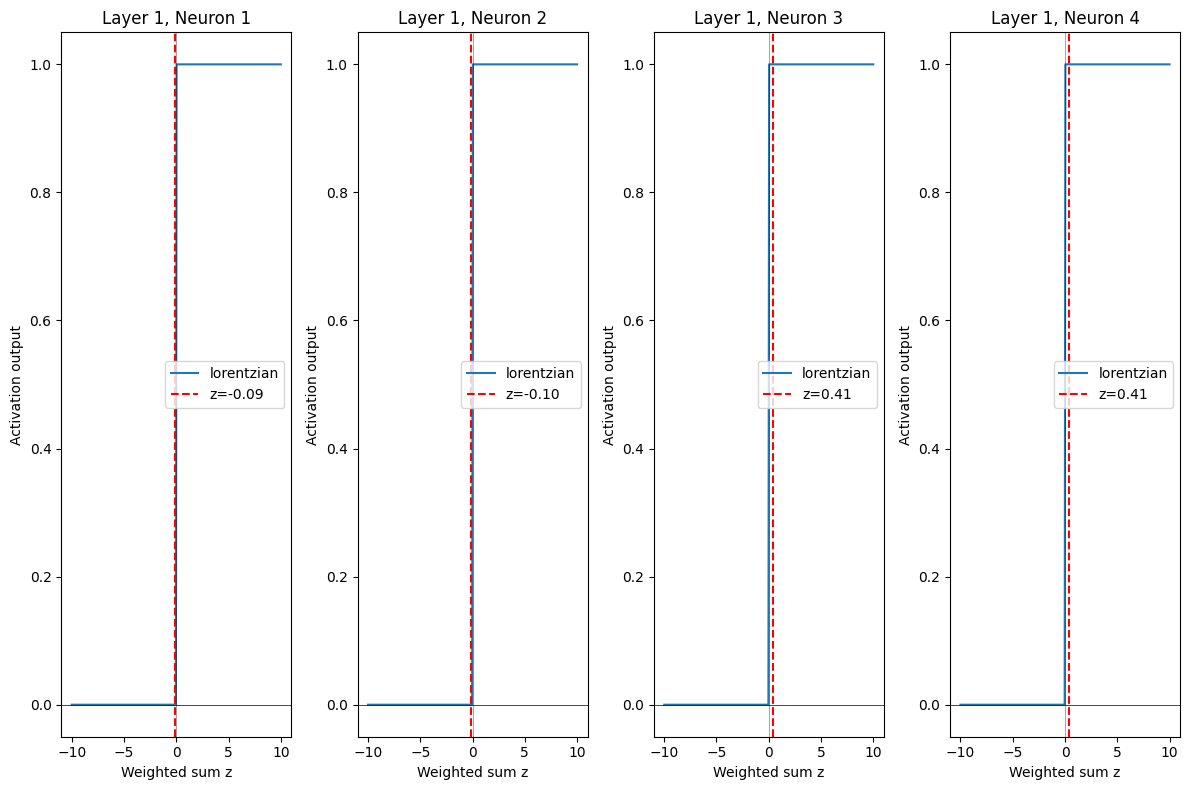

sigmoid net output: [0 0 1 1]


In [ ]:
import random
layer_weights = [[
    [0, 0, 0, 0, 0, 0, 0, 1, 0.5, 0.5],  # neuron 1
    [0, 0, 0, 0, 0.5, 0.33, 0, 0, 0, 0],     # neuron 2
    [0, 0, 1, 0.5, 0, 0.33, 0, 0, 0, 0.5],     # neuron 3
    [0, 1, 0, 0.5, 0, 0, 0.33, 0, 0.5, 0]      # neuron 4
]]
bias=[-0.1,-0.1,-0.1,-0.1]  # biases for each neuron in the layer

low1, high1 = 0.0, 0.01   # lower range
low2, high2 = 0.99, 1.0   # upper range

numbers = []
for x in ([0,0,0,1,0,0,0,0,0,0]):
    if x < 0.5:  # 50% chance for lower range
        numbers.append(random.uniform(low1, high1))
    else:  # 50% chance for upper range
        numbers.append(random.uniform(low2, high2))
print("Generated numbers:", numbers)

net=PerceptronNet([10,4],seed=42,plotting=True,all_weights=layer_weights, all_biases=[bias])
output=net.forward(numbers)
print(f"sigmoid net output: {output}")

#0000,0001,0010,0011,0110,0111,1000,1001,1010
# 0,1,2,3,4,5,6,7,8,9,10